# Preparing Time Series from Wide-Form Data

## Libraries

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as mticks
import matplotlib.pyplot as plt
import seaborn as sns
import os

SEED = 321
np.random.seed(SEED)

## Part 1

### Dataframe

In [2]:
filename = 'Data\City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


### Filtering

In [3]:
filter_size = df["SizeRank"] < 4
filter_size

0         True
1         True
2         True
3         True
4        False
         ...  
22462    False
22463    False
22464    False
22465    False
22466    False
Name: SizeRank, Length: 22467, dtype: bool

In [4]:
df = df[filter_size]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### Melting the Data

In [5]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
melted = pd.melt(df.drop(columns=['StateName','SizeRank','RegionType']),
                 id_vars=['RegionID','RegionName','State','Metro','CountyName'],
                value_name='Value',var_name="Date")
melted

,RegionID,RegionName,State,Metro,CountyName,Date,Value
0,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...
1087,17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [7]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   RegionName  1092 non-null   object        
 2   State       1092 non-null   object        
 3   Metro       1092 non-null   object        
 4   CountyName  1092 non-null   object        
 5   Date        1092 non-null   datetime64[ns]
 6   Value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 59.8+ KB


In [8]:
melted = melted.set_index("Date")
melted

,RegionID,RegionName,State,Metro,CountyName,Value
Date,,,,,,
2000-01-31,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...
2022-08-31,17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


### Resampling

In [9]:
df_ts = melted.groupby('RegionName').resample("M").asfreq('M')
df_ts

RegionID RegionName State  \
RegionName Date                                    
Chicago    2000-01-31     17426    Chicago    IL   
           2000-02-29     17426    Chicago    IL   
           2000-03-31     17426    Chicago    IL   
           2000-04-30     17426    Chicago    IL   
           2000-05-31     17426    Chicago    IL   
...                         ...        ...   ...   
New York   2022-05-31      6181   New York    NY   
           2022-06-30      6181   New York    NY   
           2022-07-31      6181   New York    NY   
           2022-08-31      6181   New York    NY   
           2022-09-30      6181   New York    NY   

                                                       Metro     CountyName  \
RegionName Date                                                               
Chicago    2000-01-31     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-02-29     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-03-31     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-04-30     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-05-31     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
...                                                      ...            ...   
New York   2022-05-31  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-06-30  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-07-31  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-08-31  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  Queens County   

                          Value  
RegionName Date                  
Chicago    2000-01-31  166139.0  
           2000-02-29  166536.0  
           2000-03-31  167368.0  
           2000-04-30  168826.0  
           2000-05-31  170499.0  
...                         ...  
New York   2022-05-31  768797.0  
           2022-06-30  773944.0  
           2022-07-31  777692.0  
           2022-08-31  779960.0  
           2022-09-30  781622.0  

[1092 rows x 6 columns]

## Part 2

### Plot of the Home Value by City

In [10]:
countries = ['Chicago','Houston','Los Angeles','New York']
plot_df = df_ts.loc[countries].copy()
plot_df

RegionID RegionName State  \
RegionName Date                                    
Chicago    2000-01-31     17426    Chicago    IL   
           2000-02-29     17426    Chicago    IL   
           2000-03-31     17426    Chicago    IL   
           2000-04-30     17426    Chicago    IL   
           2000-05-31     17426    Chicago    IL   
...                         ...        ...   ...   
New York   2022-05-31      6181   New York    NY   
           2022-06-30      6181   New York    NY   
           2022-07-31      6181   New York    NY   
           2022-08-31      6181   New York    NY   
           2022-09-30      6181   New York    NY   

                                                       Metro     CountyName  \
RegionName Date                                                               
Chicago    2000-01-31     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-02-29     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-03-31     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-04-30     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-05-31     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
...                                                      ...            ...   
New York   2022-05-31  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-06-30  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-07-31  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-08-31  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  Queens County   

                          Value  
RegionName Date                  
Chicago    2000-01-31  166139.0  
           2000-02-29  166536.0  
           2000-03-31  167368.0  
           2000-04-30  168826.0  
           2000-05-31  170499.0  
...                         ...  
New York   2022-05-31  768797.0  
           2022-06-30  773944.0  
           2022-07-31  777692.0  
           2022-08-31  779960.0  
           2022-09-30  781622.0  

[1092 rows x 6 columns]

In [11]:
plot_df.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [12]:
plot_df.index.get_level_values(1)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [13]:
unstacked = plot_df.unstack(level=0)
unstacked

RegionID                              RegionName           \
RegionName  Chicago Houston Los Angeles New York    Chicago  Houston   
Date                                                                   
2000-01-31    17426   39051       12447     6181    Chicago  Houston   
2000-02-29    17426   39051       12447     6181    Chicago  Houston   
2000-03-31    17426   39051       12447     6181    Chicago  Houston   
2000-04-30    17426   39051       12447     6181    Chicago  Houston   
2000-05-31    17426   39051       12447     6181    Chicago  Houston   
...             ...     ...         ...      ...        ...      ...   
2022-05-31    17426   39051       12447     6181    Chicago  Houston   
2022-06-30    17426   39051       12447     6181    Chicago  Houston   
2022-07-31    17426   39051       12447     6181    Chicago  Houston   
2022-08-31    17426   39051       12447     6181    Chicago  Houston   
2022-09-30    17426   39051       12447     6181    Chicago  Houston   

                                    State          ...  \
RegionName  Los Angeles  New York Chicago Houston  ...   
Date                                               ...   
2000-01-31  Los Angeles  New York      IL      TX  ...   
2000-02-29  Los Angeles  New York      IL      TX  ...   
2000-03-31  Los Angeles  New York      IL      TX  ...   
2000-04-30  Los Angeles  New York      IL      TX  ...   
2000-05-31  Los Angeles  New York      IL      TX  ...   
...                 ...       ...     ...     ...  ...   
2022-05-31  Los Angeles  New York      IL      TX  ...   
2022-06-30  Los Angeles  New York      IL      TX  ...   
2022-07-31  Los Angeles  New York      IL      TX  ...   
2022-08-31  Los Angeles  New York      IL      TX  ...   
2022-09-30  Los Angeles  New York      IL      TX  ...   

                                         Metro  \
RegionName                         Los Angeles   
Date                                             
2000-01-31  Los Angeles-Long Beach-Anaheim, CA   
2000-02-29  Los Angeles-Long Beach-Anaheim, CA   
2000-03-31  Los Angeles-Long Beach-Anaheim, CA   
2000-04-30  Los Angeles-Long Beach-Anaheim, CA   
2000-05-31  Los Angeles-Long Beach-Anaheim, CA   
...                                        ...   
2022-05-31  Los Angeles-Long Beach-Anaheim, CA   
2022-06-30  Los Angeles-Long Beach-Anaheim, CA   
2022-07-31  Los Angeles-Long Beach-Anaheim, CA   
2022-08-31  Los Angeles-Long Beach-Anaheim, CA   
2022-09-30  Los Angeles-Long Beach-Anaheim, CA   

                                                    CountyName                 \
RegionName                               New York      Chicago        Houston   
Date                                                                            
2000-01-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-02-29  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-03-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-04-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-05-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
...                                           ...          ...            ...   
2022-05-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-06-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-07-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-08-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   

                                                  Value                        \
RegionName         Los Angeles       New York   Chicago   Houston Los Angeles   
Date                                                                            
2000-01-31  Los Angeles County  Queens County  166139.0  109068.0    234181.0   
2000-02-29  Los Angeles Count

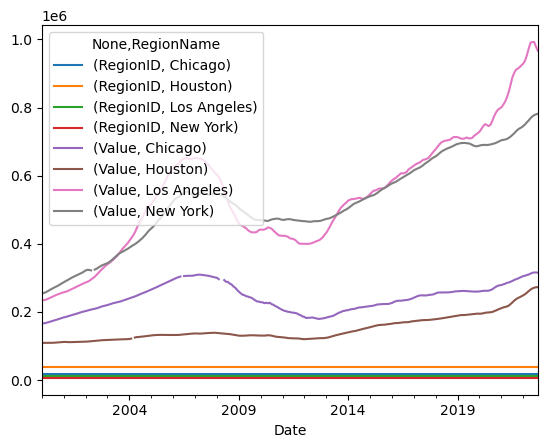

In [14]:
ax = unstacked.plot()

In [15]:
unstacked.columns

MultiIndex([(  'RegionID',     'Chicago'),
            (  'RegionID',     'Houston'),
            (  'RegionID', 'Los Angeles'),
            (  'RegionID',    'New York'),
            ('RegionName',     'Chicago'),
            ('RegionName',     'Houston'),
            ('RegionName', 'Los Angeles'),
            ('RegionName',    'New York'),
            (     'State',     'Chicago'),
            (     'State',     'Houston'),
            (     'State', 'Los Angeles'),
            (     'State',    'New York'),
            (     'Metro',     'Chicago'),
            (     'Metro',     'Houston'),
            (     'Metro', 'Los Angeles'),
            (     'Metro',    'New York'),
            ('CountyName',     'Chicago'),
            ('CountyName',     'Houston'),
            ('CountyName', 'Los Angeles'),
            ('CountyName',    'New York'),
            (     'Value',     'Chicago'),
            (     'Value',     'Houston'),
            (     'Value', 'Los Angeles'),
           

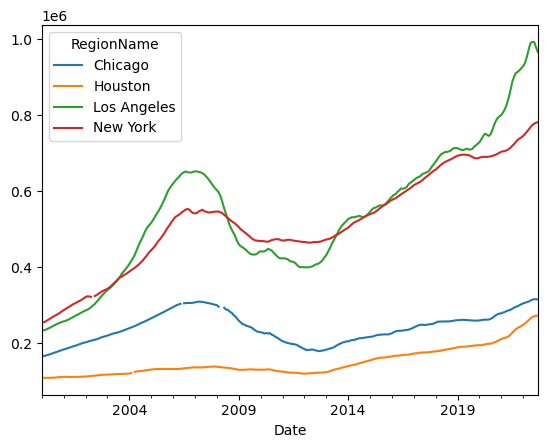

In [16]:
ax = unstacked['Value'].plot()

In [17]:
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

In [18]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

fmt_thous = mticks.FuncFormatter(thousands)

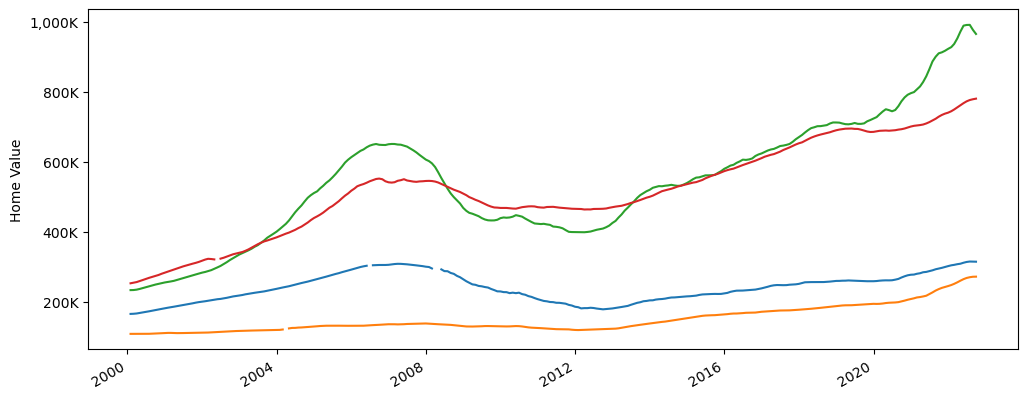

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(unstacked.index, unstacked['Value'],label='Cases')
ax.set_ylabel("Home Value")

ax.grid(False)

ax.yaxis.set_major_formatter(fmt_thous)

lines = ax.get_lines()
labels = [l.get_label() for l in lines]
fig.autofmt_xdate()

### Questions

####  Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [20]:
c_cases = df_ts.loc["Chicago",'Value']
h_cases = df_ts.loc['Houston','Value']
la_cases = df_ts.loc["Los Angeles",'Value']
ny_cases = df_ts.loc['New York','Value']

In [21]:
compare_ts = pd.DataFrame({'Chicago':c_cases,
                           'Houston':h_cases,
                           'Los Angeles':la_cases,
                           'New York':ny_cases})
compare_ts

,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


In [22]:
plot_ts = compare_ts["December, 2008"]
plot_ts

C:\Users\aliss\AppData\Local\Temp\ipykernel_4836\3884385541.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plot_ts = compare_ts["December, 2008"]


,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-31,265306.0,131283.0,469294.0,510309.0


Text(0.5, 1.0, 'Home Values in December 2008')

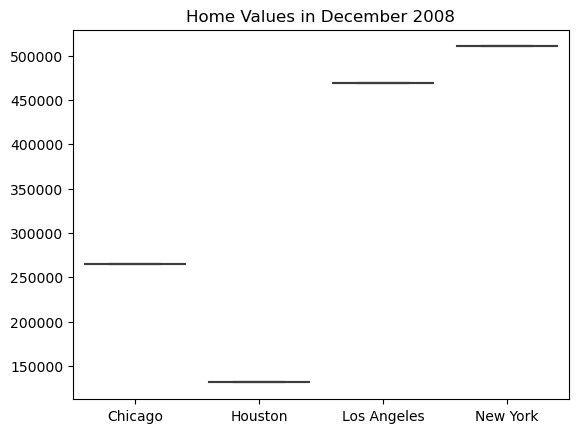

In [23]:
# Horizontal grouped boxplot in seaborn
ax = sns.boxplot(data=plot_ts)
ax.set_title("Home Values in December 2008")

Looking at the above visual you can see that New York had the highest value of homes, compared to Huston who had the lowest

#### How much did the home values change from November 2008 to December 2008 (in dollars)?

In [24]:
compare_ts

,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


In [25]:
nov_dec = compare_ts.loc['11-2008':'12-2008']
nov_dec

,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,271059.0,132247.0,481905.0,514767.0
2008-12-31,265306.0,131283.0,469294.0,510309.0


In [26]:
ts_diff = nov_dec.diff()
ts_diff

,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,NaN,NaN,NaN,NaN
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0


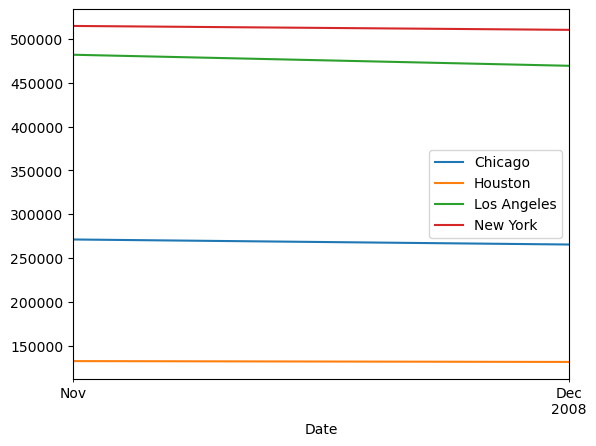

In [27]:
nov_dec.plot();

Home values decreased between November and December of 2008 across the board. Huston has the lowest drop of 964 and the largest drop was in Los Angeles with a decrease of 12,611. In the middle we have Chicago with a drop of 5,753 and New York with a drop of 4,458.